In [36]:
import yfinance as yf

# Load Apple stock data
df = yf.download('AAPL', start='2020-01-01', end='2025-01-01', auto_adjust=True)
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620819  72.681266  71.373196  71.627069  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487846  72.526533  70.783248  71.034709  118387200
2020-01-07  72.146904  72.753785  71.926877  72.497491  108872000
2020-01-08  73.307503  73.609737  71.849525  71.849525  132079200


In [38]:
import pandas as pd

# Create lag features (previous day's values)
df['Close_t-1'] = df['Close'].shift(1)
df['Close_t-2'] = df['Close'].shift(2)
df['Close_t-3'] = df['Close'].shift(3)

# Drop rows with NaN values
df = df.dropna()

# Define features and target
X = df[['Close_t-1', 'Close_t-2', 'Close_t-3']]
y = df['Close']


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 8.409434423623159
R2 Score: 0.9871840766561938


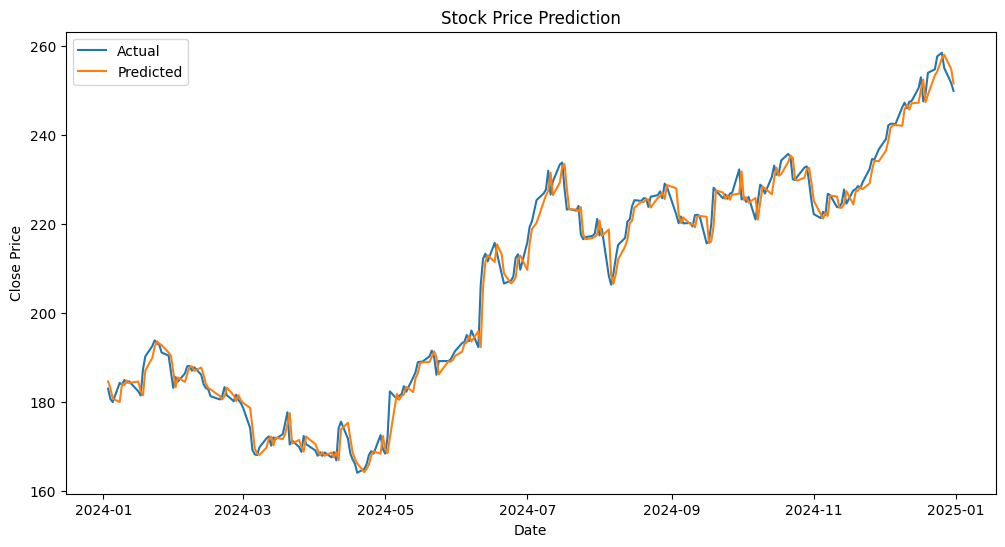

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


In [32]:
# Get latest data point
latest_features = df[['Close_t-1', 'Close_t-2', 'Close_t-3']].iloc[-1].values.reshape(1, -1)
next_day_prediction = model.predict(latest_features)

print("Predicted next day close:", next_day_prediction[0])


Predicted next day close: [251.48126022]


In [35]:
import joblib

# Replace 'stock_price_model.pkl' with your model file name
model = joblib.load('stock_price_model.pkl')